# 环境准备

In [4]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
Copyright (C) 2019 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [5]:
# 安装 mmengine 和 mmcv 依赖
# 为了防止后续版本变更导致的代码无法运行，我们暂时锁死版本
!pwd
!pip install -U openmim
!mim install mmengine
!mim install 'mmcv==2.0.0'
!mim install "mmdet>=3.0.0rc6"

!pip install opencv-python pillow matplotlib seaborn tqdm pytorch-lightning 'mmdet>=3.0.0rc1'
# 从 github 上下载最新的 mmsegmentation 源代码
# !git clone https://github.com/open-mmlab/mmsegmentation.git -b dev-1.x
# # 进入主目录
# import os
# os.chdir('mmsegmentation')


# !pip install -v -e .
# !git clone https://github.com/open-mmlab/mmpose.git -b dev-1.x
# %cd mmpose
# !pip install openmim # 安装openlab库的命令行工具
# # !mim --help
# !mim install -e . # -e 用当前目录的源码, .[multimodal] 安装多模态

!git clone https://github.com/open-mmlab/mmagic.git
%cd mmagic
!pip3 install -e .

/content
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 3.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.3/374.3 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 20.4 MB/s eta 0:00:00
  Attempting uninstall: platformdirs
    Found existing installation: platformdirs 3.3.0
    Uninstalling platformdirs-3.3.0:
      Successfully uninstalled platformdirs-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 MB 4.3 MB/s eta 0:00:00
Looking in indexes: ht

In [7]:
from mmengine.utils import get_git_hash
from mmengine.utils.dl_utils import collect_env as collect_base_env

import mmagic

# 环境信息收集和打印
def collect_env():
    """Collect the information of the running environments."""
    env_info = collect_base_env()
    env_info['mmagic'] = f'{mmagic.__version__}+{get_git_hash()[:7]}'
    return env_info


if __name__ == '__main__':
    for name, val in collect_env().items():
        print(f'{name}: {val}')

sys.platform: linux
Python: 3.10.12 (main, Jun  7 2023, 12:45:35) [GCC 9.4.0]
CUDA available: False
numpy_random_seed: 2147483648
GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
PyTorch: 2.0.1+cu118
PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201703
  - Intel(R) oneAPI Math Kernel Library Version 2022.2-Product Build 20220804 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.7.3 (Git Hash 6dbeffbae1f23cbbeae17adb7b5b13f1f37c080e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - Build settings: BLAS_INFO=mkl, BUILD_TYPE=Release, CUDA_VERSION=11.8, CUDNN_VERSION=8.7.0, CXX_COMPILER=/opt/rh/devtoolset-9/root/usr/bin/c++, CXX_FLAGS= -D_GLIBCXX_USE_CXX11_ABI=0 -fabi-version=11 -Wno-deprecated -fvisibility-inlines-hidden -DUSE_PTHREADPOOL -DNDEBUG -DUSE_KINETO -DLIBKINETO_NOROCTRACER -DUSE_FBGEMM -DUSE_QNNPACK -DUSE_PYTORCH_QNNPACK -DUS

# 1 数据集准备和可视化



In [2]:
import cv2


image = cv2.imread('/content/微信图片_20230616083820.jpg')

# 使用Canny边缘检测
edges = cv2.Canny(image, threshold1=30, threshold2=100)

# 保存图像
cv2.imwrite('edges.jpg', edges)

True

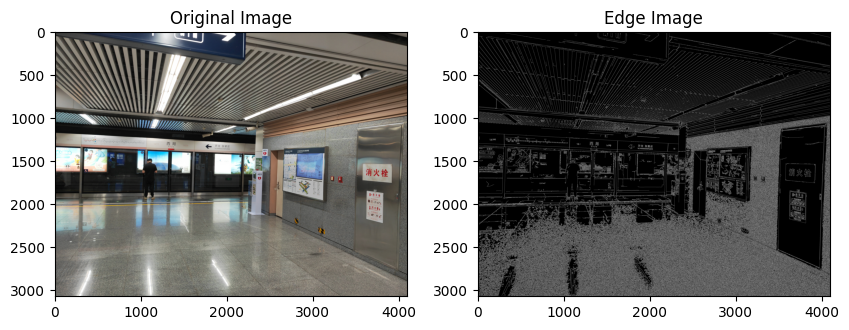

In [3]:
import matplotlib.pyplot as plt

# 读取原图
original = cv2.imread('/content/微信图片_20230616083820.jpg', cv2.IMREAD_COLOR)

# 读取处理后的图像
edges = cv2.imread('edges.jpg', cv2.IMREAD_COLOR)

# OpenCV使用BGR模式，而matplotlib使用RGB模式，所以我们需要转换颜色模式
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
edges = cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)

# 创建子图来展示对比
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# 展示原图
axs[0].imshow(original, cmap='gray')
axs[0].set_title('Original Image')

# 展示处理后的图像
axs[1].imshow(edges, cmap='gray')
axs[1].set_title('Edge Image')

# 显示图像
plt.show()

# 2 模型载入



In [4]:
# !pip install accelerate
!pwd
%cd mmagic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/content
/content/mmagic


In [6]:
import cv2
import numpy as np
import mmcv
from mmengine import Config
from PIL import Image

from mmagic.registry import MODELS
from mmagic.utils import register_all_modules

register_all_modules()

cfg = Config.fromfile('configs/controlnet/controlnet-canny.py')
controlnet = MODELS.build(cfg.model)


06/16 00:58:35 - mmengine - INFO - Set model dtype to 'torch.float32'.
06/16 00:58:44 - mmengine - INFO - Creating runwayml/stable-diffusion-v1-5 by 'HuggingFace'


/content/mmagic/mmagic/models/archs/wrapper.py:149: FutureWarning: Accessing config attribute `block_out_channels` directly via 'AutoencoderKL' object attribute is deprecated. Please access 'block_out_channels' over 'AutoencoderKL's config object instead, e.g. 'unet.config.block_out_channels'.
  return getattr(self.model, name)


Do not support Xformers. Please install Xformers first. The program will run without Xformers.
06/16 00:58:46 - mmengine - INFO - Set model dtype to 'torch.float32'.
Do not support Xformers. Please install Xformers first. The program will run without Xformers.


In [7]:

control_img = mmcv.imread('/content/edges.jpg')
control = cv2.Canny(control_img, 100, 200)
control = control[:, :, None]
control = np.concatenate([control] * 3, axis=2)
control = Image.fromarray(control)

In [8]:
prompt = 'Please decorate the subway, the dreamlike scene of blue sky and white clouds should have a sense of the future;'  #'请给地铁装修一下，蓝天白云梦幻般的场景，要有未来感；'

**预测**

In [10]:
output_dict = controlnet.infer(prompt, control=control)
samples = output_dict['samples']
for idx, sample in enumerate(samples):
    sample.save(f'sample_{idx}.png')
controls = output_dict['controls']
for idx, control in enumerate(controls):
    control.save(f'control_{idx}.png')

  0%|          | 0/20 [00:52<?, ?it/s]



KeyboardInterrupt



#  结果展示



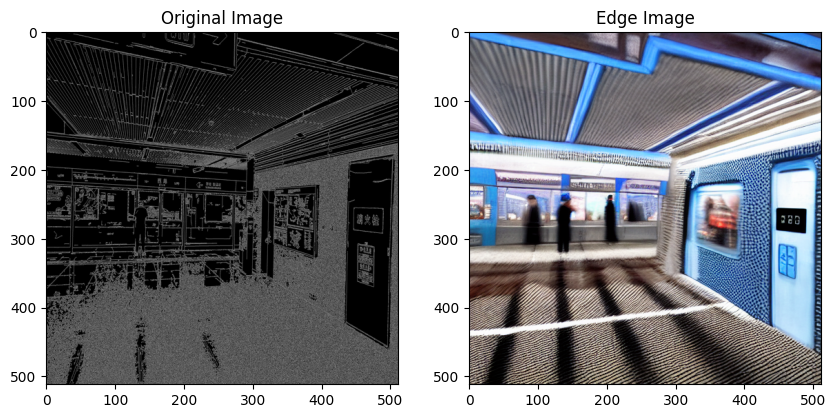

In [11]:
import matplotlib.pyplot as plt
import cv2

# 以彩色模式读取图片
original = cv2.imread('/content/mmagic/control_0.png', cv2.IMREAD_COLOR)
edges = cv2.imread('/content/mmagic/sample_0.png', cv2.IMREAD_COLOR)

# OpenCV使用BGR模式，而matplotlib使用RGB模式，所以我们需要转换颜色模式
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
edges = cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)

# 创建子图来展示对比
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# 展示原图
axs[0].imshow(original)
axs[0].set_title('Original Image')

# 展示处理后的图像
axs[1].imshow(edges)
axs[1].set_title('Edge Image')

# 显示图像
plt.show()